## Implementation on Random dataset

In [151]:
import numpy as np
import pandas as pd

***Dataframe***

In [152]:
samples = 10000
num_features = 2
features = np.random.rand(samples, num_features)
classes = np.random.choice(['d', 'c'], size=samples)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
classes_numeric = label_encoder.fit_transform(classes)
df = pd.DataFrame({'Feature 1': features[:, 0], 'Feature 2': features[:, 1], 'Class': classes_numeric})


***Split the data into training and testing sets***


In [153]:
from sklearn.model_selection import train_test_split
X = df[['Feature 1', 'Feature 2']]
y = df['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


***Decision Tree***

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)


0.499


***Bagging ensemble***

In [156]:
num_of_decisiontree = 10
decision_trees = []
for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train.iloc[index]
    y_sample = y_train.iloc[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)

***Predict***

In [157]:
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)

final_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.4985


In [158]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)



Random Forest Accuracy: 0.4975


## Implementation on make_moon dataset

In [159]:
from sklearn.datasets import make_moons, make_classification
X, y = make_moons(n_samples=100, noise=0.3 , random_state=42 )

Text(0, 0.5, 'Feature 2')

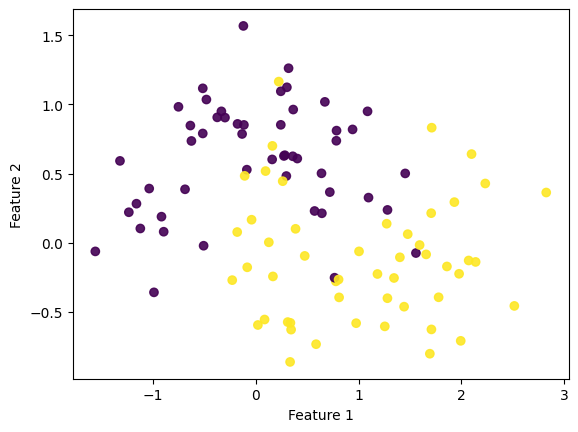

In [160]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

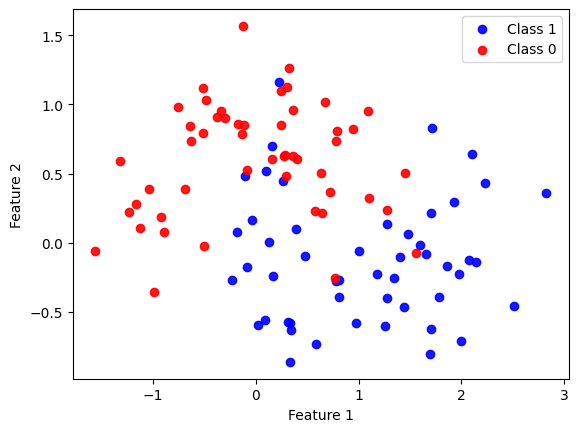

In [161]:
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', label='Class 1', alpha=0.9)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', label='Class 0', alpha=0.9)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

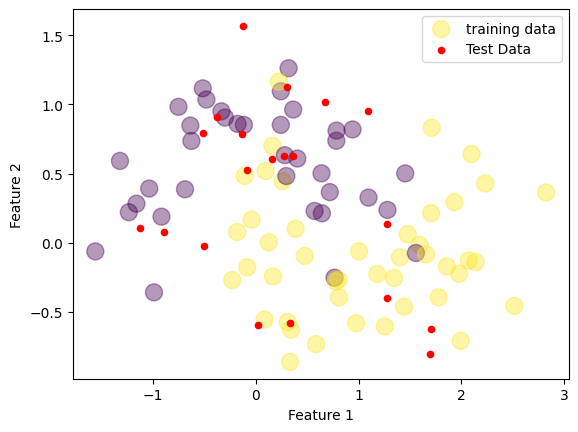

In [163]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=150,alpha=0.4,cmap='viridis',label='training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=20, alpha=1.0, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();

In [164]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


[Help: github](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

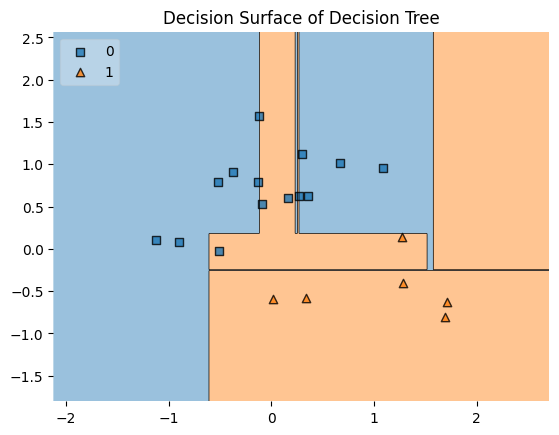

In [165]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_test, y=y_test, clf=dt, legend=2)
plt.title('Decision Surface of Decision Tree');


[Help : Stackoverflow](https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a)

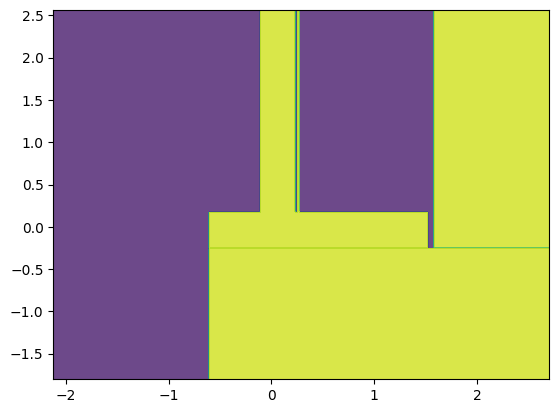

In [166]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis');

In [167]:
from scipy.stats import mode
num_of_decisiontree = 10
decision_trees = []

for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train[index]
    y_sample = y_train[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)
    
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)
final_pred = mode(predictions, axis=0)[0]

accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.8


Plot  indivisual decision tree of bagging

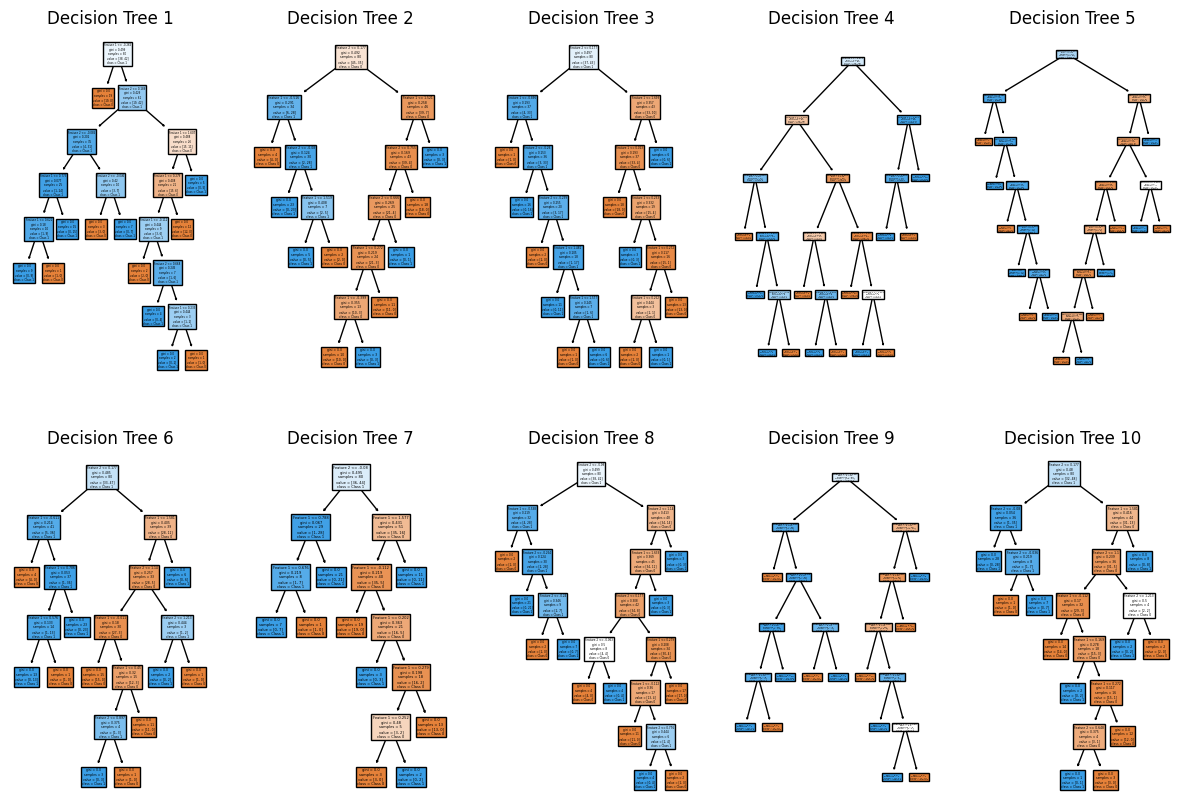

In [168]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_tree(tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
    plt.title('Decision Tree {}'.format(i+1))
plt.show()

Visualize the decision surface of each decision tree of bagging

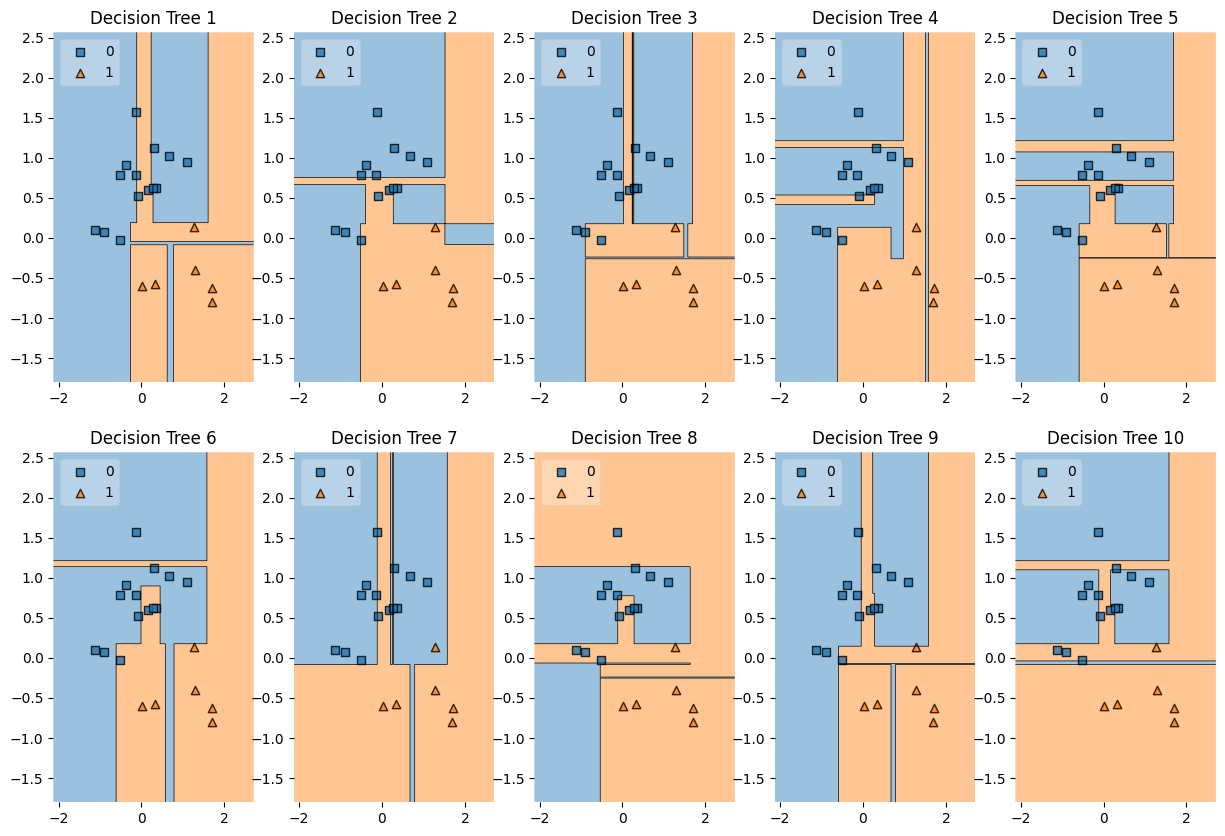

In [169]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_decision_regions(X=X_test, y=y_test, clf=tree, legend=2)
    plt.title('Decision Tree {}'.format(i+1))
plt.show()

## Implementation on make_classification dataset

In [170]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100,        
    n_features=5,        #any
    n_informative=3,      
    n_redundant=2,        # derived from informative f..
    n_classes=3,          # any
    flip_y=0.1,          # noise level
    random_state=42       
)


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


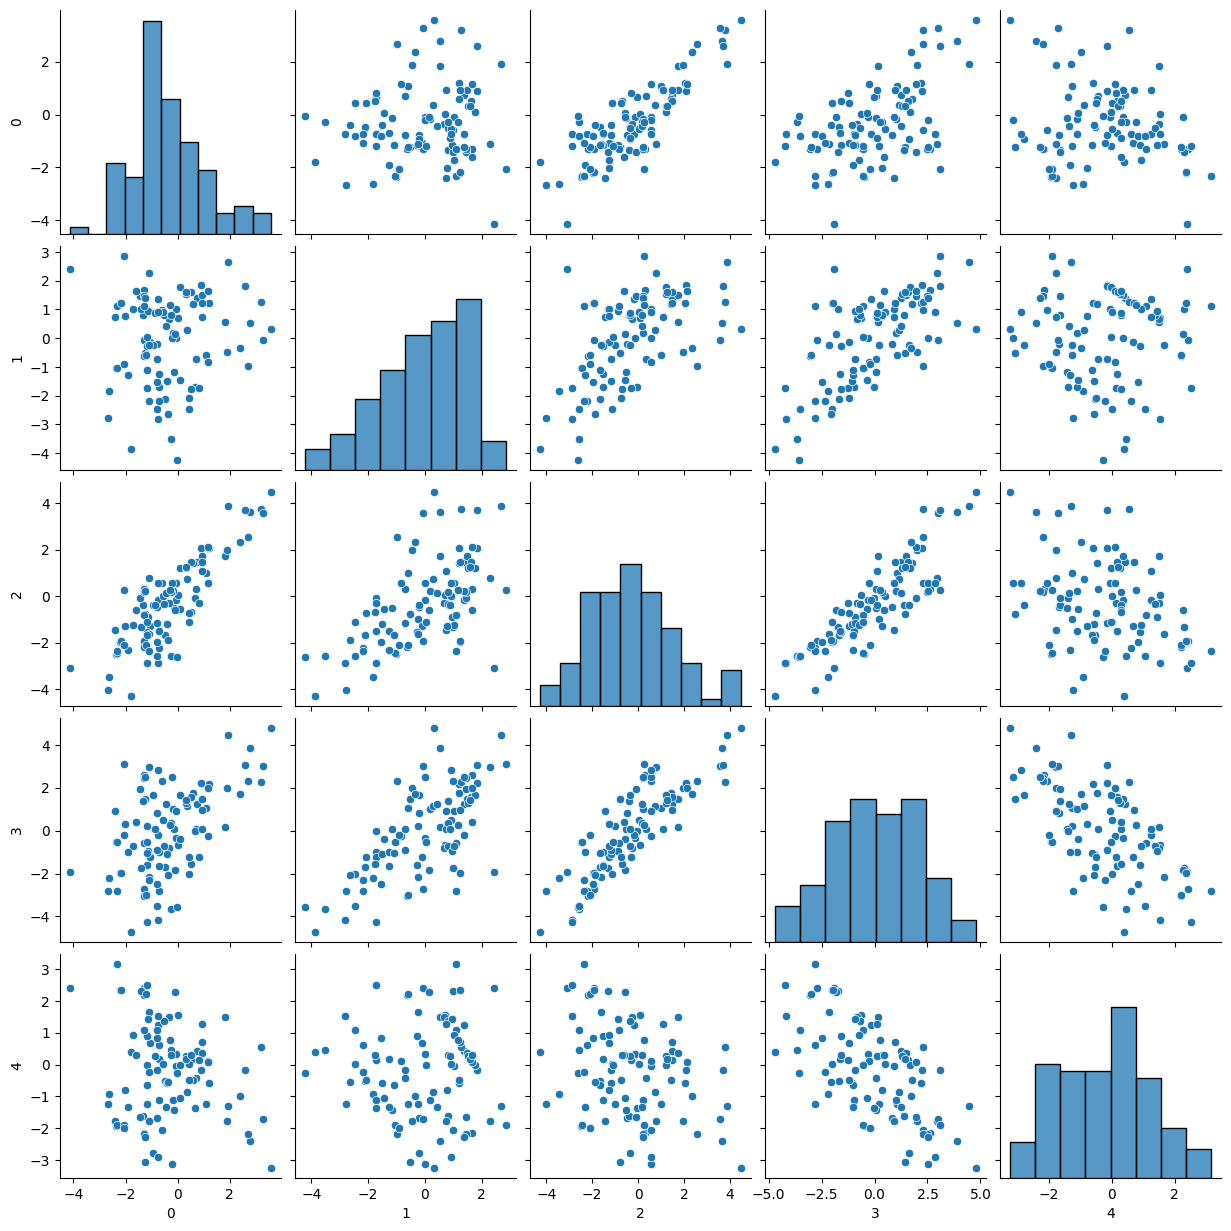

In [171]:
import seaborn as sns
df = pd.DataFrame(X)
sns.pairplot(df);

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

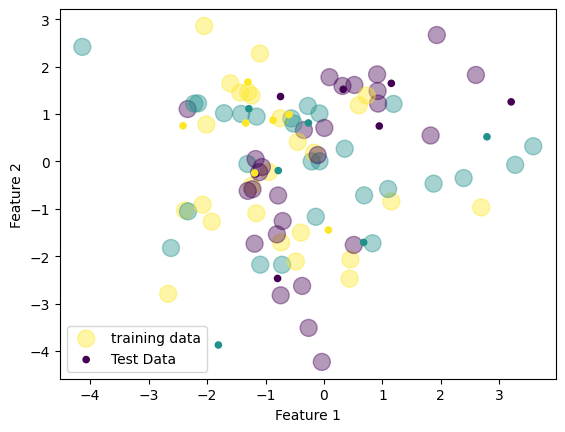

In [174]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=150,alpha=0.4,cmap='viridis',label='training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, alpha=1.0, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();


In [175]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [176]:
num_of_decisiontree = 10
decision_trees = []

for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train[index]
    y_sample = y_train[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)
    
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)
final_pred = mode(predictions, axis=0)[0]

accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.8


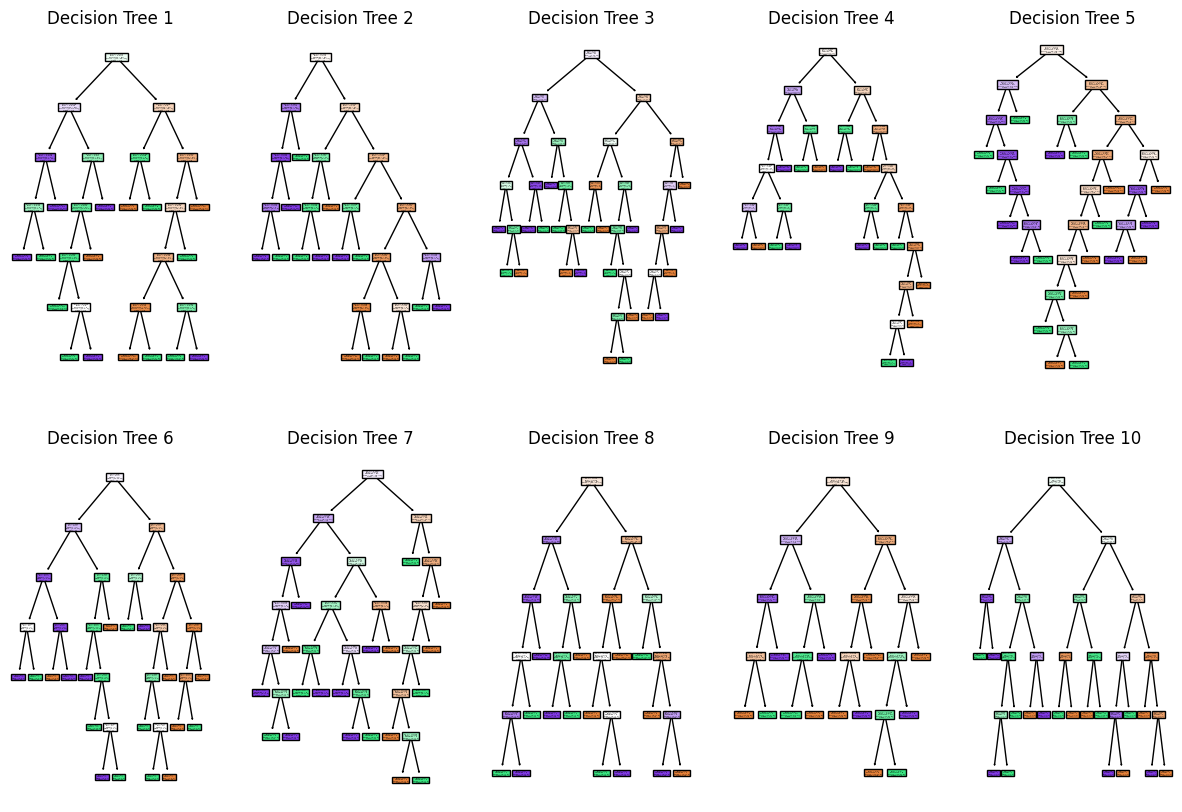

In [179]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_tree(tree, filled=True, feature_names=['F0', 'F1','F2','F3','F4'], class_names=['C0', 'C1','C2','C3'])
    plt.title('Decision Tree {}'.format(i+1))
plt.show()

** unable to plot decision surface for more than two features** : please give reference


## Random forest 

In [193]:
rf = RandomForestClassifier(n_estimators=25, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.75


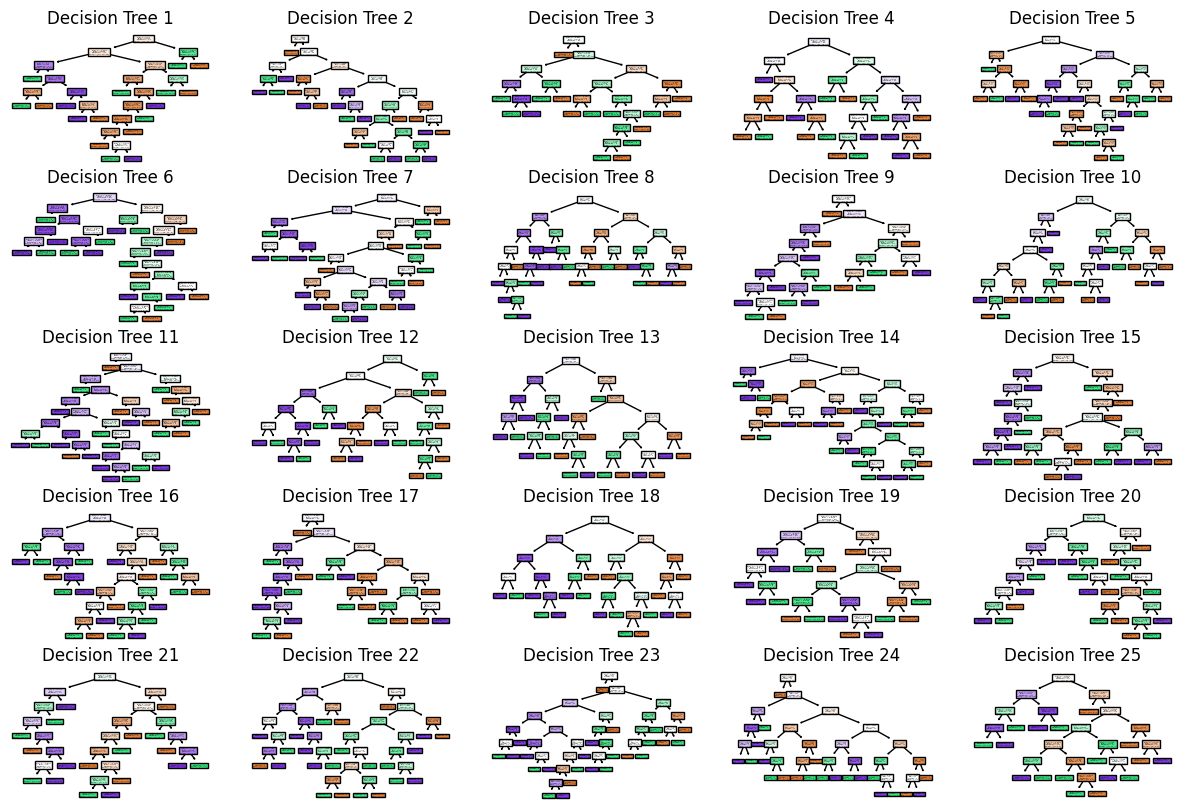

In [197]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(5, 5, i + 1) 
    plot_tree(tree, filled=True)
    plt.title('Decision Tree {}'.format(i + 1))
plt.show()

## Gradient Decent

In [201]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(X.shape, y.shape)


(1000, 2) (1000,)


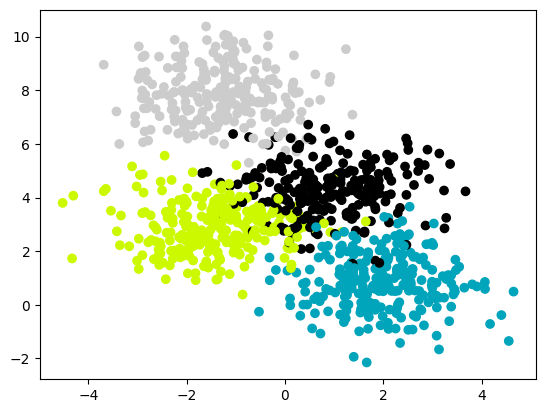

In [202]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

In [203]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y.shape)

(800, 2) (200, 2) (1000,)


In [207]:
import torch
X_train, y_train, X_test, y_test = map(torch.tensor, (X_train, Y_train, X_test,y_test ))


In [208]:
print(X_train.shape, Y_train.shape)

     

torch.Size([800, 2]) (800,)


In [209]:
a = torch.rand([2, 4])
print(a)
print(a.exp())
print(a.exp().sum())
print(a.exp().sum(0))
print(a.exp().sum(-1))
print(a.exp().sum(-1).unsqueeze(-1))

tensor([[0.7405, 0.2869, 0.8941, 0.3707],
        [0.0661, 0.3714, 0.8638, 0.5354]])
tensor([[2.0970, 1.3323, 2.4451, 1.4487],
        [1.0684, 1.4498, 2.3721, 1.7082]])
tensor(13.9216)
tensor([3.1653, 2.7821, 4.8172, 3.1569])
tensor([7.3231, 6.5985])
tensor([[7.3231],
        [6.5985]])


In [210]:

def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
  return h2

In [213]:
import math
weights1 = torch.randn(2, 2) 
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) 
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

In [215]:
y = torch.tensor([1, 0])
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [214]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [217]:
learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []
X_train = X_train.float()
Y_train = Y_train.long()

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()


AttributeError: 'numpy.ndarray' object has no attribute 'long'

In [ ]:
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])